In [1]:
from flows import NVPFlow, DFlow, ResFlow, BNFlow, phase, Normal, Linear
from flows.config import floatX
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(1234)
N = 10

X = np.random.normal(size=[N,3]).astype(floatX)
X[:,0] = (X[:,0] + X[:,1])/2
X[:,2] = (- X[:,0] - X[:,1] + X[:,2])/3
ystd = 0.5
y = 2*X[:,0] + X[:,1] + 0.5*X[:,2] + 3 + np.random.normal(size=N)*ystd

In [3]:
y.dtype

dtype('float64')

In [4]:
dim = 4
conf = [[NVPFlow(dim, 'nvp{}'.format(i))] for i in range(6)]
conf = sum(conf, [])

# conf = [Linear(dim)]

appr = DFlow(conf)

In [5]:
coefs = appr.output[0]

observ_d = Normal(dim=None, sigma=ystd)

eps = y - X[:,0]*coefs[0] - X[:,1]*coefs[1] - X[:,2]*coefs[2]- coefs[3]

logl = observ_d.logdens(eps, full_reduce=True)

In [6]:
logl

<tf.Tensor 'Sum_1:0' shape=() dtype=float64>

In [7]:
prior = Normal(dim=None, sigma=10).logdens(coefs)

In [8]:
prior

<tf.Tensor 'Sum_2:0' shape=() dtype=float64>

In [9]:
gain = logl + prior - appr.logdens
gain /= N

In [10]:
logl

<tf.Tensor 'Sum_1:0' shape=() dtype=float64>

In [11]:
appr.logdens

<tf.Tensor 'sub_1:0' shape=(1,) dtype=float64>

In [12]:
opt = tf.train.GradientDescentOptimizer(0.0001).minimize(-gain)

In [13]:
sess = tf.InteractiveSession()

In [14]:
tf.global_variables_initializer().run()

In [15]:
for _ in range(30):
    for _ in range(5000):
        v, _ = sess.run([gain, opt], {phase: True})
    print(v[0])

-1.5938346279876114
-5.075263449856583
-2.359329109402596
-2.4645964676081378
-2.019715930594052
-1.960658068505484
-1.7741254255288736
-2.081432732442559
-1.7111057340676645
-2.1542970508803125
-1.864016366896454
-1.8571566658391283
-2.3188884808311894
-1.9870331184103047
-1.941984282736066
-1.7956283624569394
-1.7681684963164144
-1.9595752771482975
-1.9207761218027037
-2.00969834399408
-1.7932449305156937
-1.854402940286834
-1.8625154451058066
-1.864534818719924
-1.9207285648214636
-1.8909781834325128
-1.9402192011632593
-1.8415626225668675
-1.8064582104776707
-1.94089566494585


In [16]:
samples = []
for _ in range(3000):
    samples.append(coefs.eval({phase: False}))
samples = np.array(samples)

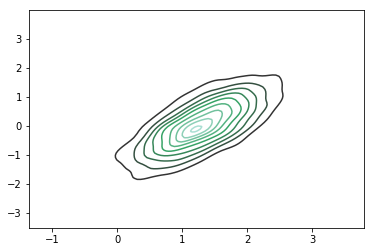

In [17]:
sns.kdeplot(samples[:,0], samples[:,2])
plt.show()

In [18]:
samples.mean(axis=0)

array([1.28349013e+00, 9.32390677e-01, 1.01492510e-03, 3.29384684e+00])